# Introduction to DEA Waterbodies <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[DEA Waterbodies](https://www.ga.gov.au/dea/products/dea-waterbodies)


### What this product offers
[DEA Waterbodies](https://www.ga.gov.au/dea/products/dea-waterbodies) uses Geoscience Australia’s archive of over 30 years of Landsat satellite imagery to identify where almost 300,000 waterbodies are in the Australian landscape and tells us the wet surface area within those waterbodies.

The tool uses a water classification for every available Landsat satellite image and maps the locations of waterbodies across Australia. It provides a time series of wet surface area for waterbodies that are present more than 10% of the time and are larger than 3125 m$^2$ (5 Landsat pixels).

The tool indicates changes in the wet surface area of waterbodies. This can be used to identify when waterbodies are increasing or decreasing in wet surface area.

**Disclaimer: This graph shows the wet surface area of waterbodies as estimated from satellites. It does not show depth, volume, purpose of the waterbody, nor the source of the water.**

The product contains polygons of maximum extent and surface area time series for each waterbody. These waterbodies have been derived from [Water Observations from Space](https://www.ga.gov.au/dea/products/wofs), a classifier which detects open water in Landsat pixels.

### Applications
* Tracking water in the landscape over time
* Visualising the change in lakes and dams

### Publications
* Krause, C. et al. (in preparation)
* Mueller, N., Lewis, A., Roberts, D., Ring, S., Melrose, R., Sixsmith, J., Lymburner, L., McIntyre, A., Tan, P., Curnow, S., & Ip, A. (2016). Water observations from space: Mapping surface water from 25 years of Landsat imagery across Australia. *Remote Sensing of Environment*, 174, 341–352. https://doi.org/10.1016/j.rse.2015.11.003

> **Note:** For more technical information about DEA Waterbodies, visit the official [Geoscience Australia DEA Waterbodies product description](https://cmi.ga.gov.au/data-products/dea/456/waterboards).

## Description
This notebook will demonstrate how to load data from DEA Waterbodies using the scripts in this repository.
Topics covered include:

1. Getting a list of available polygons in an area
2. Accessing a polygon
3. Plotting the surface area of the polygon over time

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append("../Scripts")
from dea_plotting import display_map
import dea_waterbodies

## Analysis parameters

Choose an area to analyse:

In [2]:
xlim = (148.98, 149.165)
ylim = (-35.348, -35.244)

bbox = (xlim[0], ylim[0], xlim[1], ylim[1])
display_map(xlim, ylim)

## Getting data

### List geohashes and polygons in an area
We can get a list of geohashes using `get_geohashes`.


In [3]:
gh = dea_waterbodies.get_geohashes(bbox, crs="EPSG:4326")

In [4]:
len(gh)

43

We can also get the polygons for the same area.

In [5]:
polys = dea_waterbodies.get_waterbodies(bbox, crs="EPSG:4326")

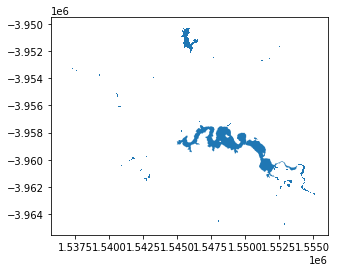

In [6]:
polys.plot()

### Getting data for a specific waterbody

If we have a geohash or a polygon, we can get the surface area over time.

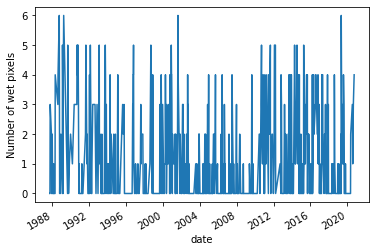

In [7]:
dea_waterbodies.get_time_series(waterbody=polys.iloc[0])["px_wet"].plot()
plt.ylabel("Number of wet pixels");

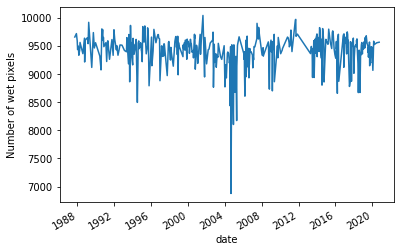

In [8]:
dea_waterbodies.get_time_series(geohash="r3dp1nxh8")["px_wet"].plot()
plt.ylabel("Number of wet pixels");

We can also get the polygon and metadata for just this waterbody.

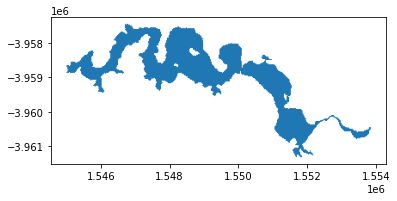

In [9]:
dea_waterbodies.get_waterbody("r3dp1nxh8").plot()

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** November 2020

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)